In [1]:
using PyPlot #; pygui(true)

# Aufgabe1

### Teilaufgabe a

Mit $\vec{u} = \begin{pmatrix} u_1 \\ u_2 \\ u_3 \\ u_4 \end{pmatrix} = \begin{pmatrix} r \\ \dot r \\ \phi \\ \dot \phi \end{pmatrix}$ und $\frac{\partial V}{\partial r} = \frac{\dot r}{r^2}$ lässt sich die Differentialgleichung umformen zu:
\begin{align}
\frac{\partial}{\partial t} \begin{pmatrix} u_1 \\ u_2 \\ u_3 \\ u_4 \end{pmatrix} =
\begin{pmatrix} u_2 \\ u_1u_4^2-\frac{1}{mu_1^2} \\ u_4 \\ -2\frac{u_2u_4}{u_1} \end{pmatrix} = f
\end{align}


In [9]:
function euler(f, start, t, fargs = [])
    # f = zu Differenzierende Funktion; start = Anfangswertvektor (Aufsteigend in der Ordnung)
    ## t = Array der Zeititerationen; fargs = moegliche Argumente der Funktion
    steps = length(t)-1
    dt = (t[steps+1] - t[1])/(steps)
    order = length(start) # Ordnung der DGL
    result = Array(Float64, order, steps+1)
    result[:, 1] = start
    for i in 1:steps
        last_values = result[:, i] # Ergebnisse aus letzer Iterarion
        result[:,i+1] = last_values + dt * f(last_values..., fargs...) # Euler Schritt
    end
    return [result[i,:] for i in 1:order]
end

euler (generic function with 2 methods)

In [10]:
function f(u1, u2, u3, u4, m)
    return [u2, u1*u4^2-1/(m*u1^2), u4, -2*u2*u4/u1]
end
function rad2xy(radius, phi)
    N = length(radius)
    x = Array(Float64, N)
    y = Array(Float64, N)
    for i in 1:N
        x[i] = r[i]*cos(phi[i])
        y[i] = r[i]*sin(phi[i])
    end
    return [x, y]
end

rad2xy (generic function with 1 method)

### Teilaufgabe b

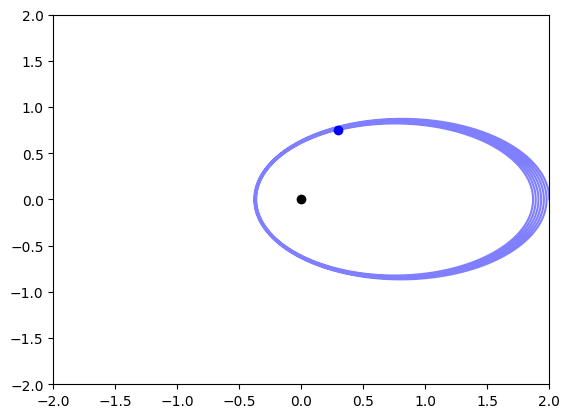

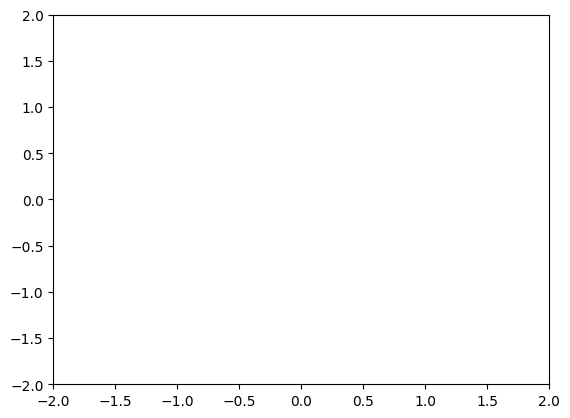

In [63]:
t = linspace(0.,50., 1e5)
start = [2,0,0,.2]
m = 1
(r, dr, phi, dphi) = euler(f, start, t, m)
(x, y) = rad2xy(r, phi)

fig = figure(1)
for n = 1:500:length(x)
    plot(0, 0, "o", color="black", animated=true)
    plot(x[1:n], y[1:n], "b-", alpha=0.5, animated=true)
    plot(x[n], y[n], "bo", animated=true)
    axis = gca()
    axis[:set_xlim]([-2,2])
    axis[:set_ylim]([-2,2])
    sleep(.01)
    IJulia.clear_output(true)
    display(fig)
    cla()
end


### Teilaufgabe c

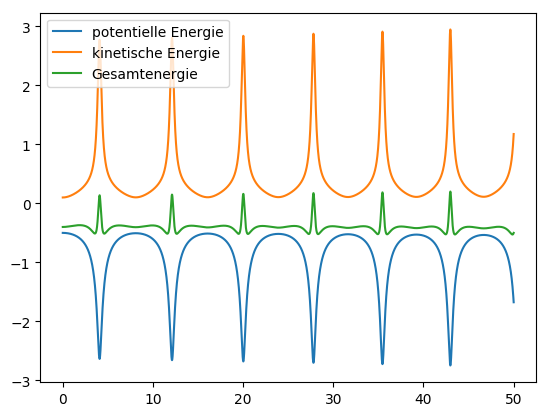

PyObject <matplotlib.legend.Legend object at 0x7f79e6d86650>

In [48]:
function pot_energy(r)
    E_pot = Array(Float64, length(r))
    for i in 1:length(E_pot)
        E_pot[i] = -1/r[i]
    end
    return E_pot
end
function kin_energy(dx, dy)
    E_kin = Array(Float64, length(dx))
    for i in 1:length(E_pot)
        E_kin[i] = .5*sqrt(dx[i]^2+dy[i]^2)
    end
    return E_kin
end

E_kin = kin_energy(dr, dphi)
E_pot = pot_energy(r)
plot(t, E_pot, label="potentielle Energie")
plot(t, E_kin, label="kinetische Energie")
plot(t, E_kin+E_pot, label="Gesamtenergie")
legend()

### Teilaufgabe d

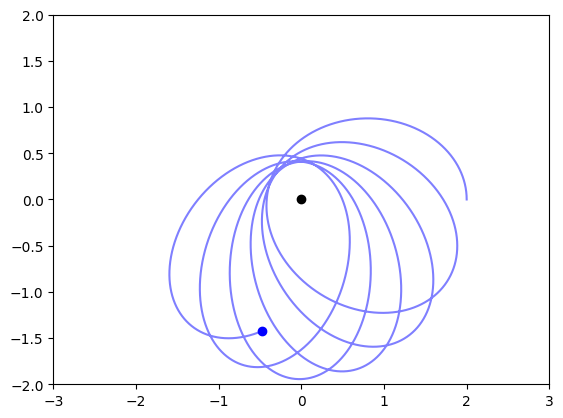

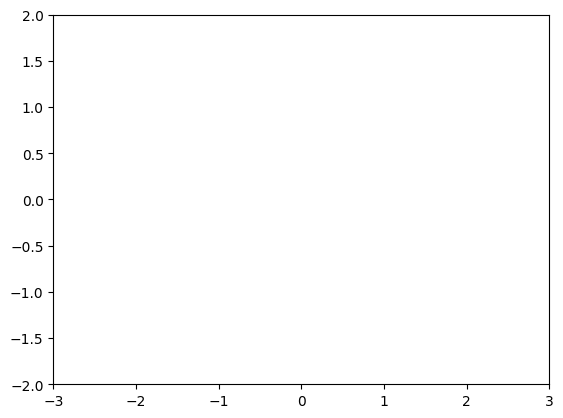

In [62]:
function f_alpha(u1, u2, u3, u4, m, alpha)
    return [u2, u1*u4^2-(1/m*(1/u1^2-3*alpha/u1^4)), u4, -2*u2*u4/u1]
end
t = linspace(0.,50., 1e5)
start = [2,0,0,.2]
m = 1
alpha = 1e-2
(r, dr, phi, dphi) = euler(f_alpha, start, t, (m,alpha))
(x, y) = rad2xy(r, phi)

fig = figure(2)
for n = 1:500:length(x)
    plot(0, 0, "o", color="black", animated=true)
    plot(x[1:n], y[1:n], "b-", alpha=0.5, animated=true)
    plot(x[n], y[n], "bo", animated=true)
    axis = gca()
    axis[:set_xlim]([-3,3])
    axis[:set_ylim]([-2,2])
    sleep(.01)
    IJulia.clear_output(true)
    display(fig)
    cla()
end
